**Fabíola Loterio**

# **Distribuição de fósseis de dinossauros**

Nosso [dataset](https://www.kaggle.com/datasets/smruthiiii/dinosaur-dataset?resource=download) explora a ocorrência de fósseis de dinossauros em diferentes regiões.

Nossa análise exploratória vai focar na distribuição dessas ocorrências tanto geograficamente como em idade estimada. Por fim, tentamos combinar as duas análises em mapas que refletem onde viviam os dinossauros em cada época. Todavia, devemos lembrar que nossas observações estão limitadas a fósseis encontrados, e que isso não necessariamente reflete as condições da época, já que isso depende da conservação de fósseis e locais de escavação, por exemplo.

Começamos importando módulos que vão nos ajudar a analisar os dados.

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

A seguir, carregamos nosso dataframe e apresentamos as primeiras linhas de dados.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/dinos/dinosaurs.csv")
df.head()

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae


Analisamos as primeiras informações sobre nosso banco de dados a seguir.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


Nossos banco de dados possui 4951 ocorrências, com 12 variáveis atribuídas. Vamos investigar o que cada variável significa e assim guiar os próximos passos da nossa análise.


* ``occurrence_no`` é apenas um número de identificação do fóssil. Esse é um número que não agrega nossa análise e será tratado como o novo id das nossas linhas;

* ``name`` é o nome do dinossauro associado àquele fóssil. Essa é uma variável qualitativa;

* ``diet`` é a principal dieta do dinossauro associado àquele fóssil. Note que essa é uma variável qualitativa que deve ser dependente da variável ``name``;

* ``type`` se refere à ordem biológica a que o dinossauro pertence. Note que essa também é uma variável qualitativa que deve depender da variável ``name``;

* ``length_m`` é a medida em metros do comprimento máximo que o dinossauro atingia. Essa é uma variável quantitativa também ligada à variável ``name``;

* ``max_ma`` é a menor idade estimada, em milhões de anos, desse fóssil. Essa é uma variável quantitativa dependente da variável ``name``;

* ``min_ma`` é a maior idade estimada, em milhões de anos, desse fóssil. Essa é uma variável quantitativa também dependente da variável ``name``;

* ``region`` é a cidade em que o fóssil foi encontrado. Essa é uma variável qualitativa. Diferente das anteriores, ela descreve a cidade da ocorrência do fóssil e não depende de ``name``;

* ``lng`` é a longitude em que o fóssil foi encontrado. Essa é uma variável quantitativa;

* ``lat`` é a latitude em que o fóssil for encontrado. Essa é uma variável quantitativa. É esperado que as variáveis ``lat`` e ``lng`` estejam fortemente relacionadas com ``region``;

* ``class`` é a classe biológica do dinossauro. Essa variável deve estar relacionada com a variável ``name``;

* ``family`` é a família biológica do dinossauro. Essa variável deve estar relacionada com a variável ``name``.

Com isso em mente, podemos avaliar a completude e consistência dos dados e preenchê-los conforme a necessidade.


In [ ]:
dinos = df.set_index("occurrence_no")

## **Consistência dos dados relacionados ao dinossauro**

O que chamamos de inconsistências, nesse caso, é a situação em que um mesmo dinossauro tem mais de uma dieta, tipo, classe ou família associada a ele. Isso não pode ocorrer pois cada uma dessas classificações biológicas é única.

In [ ]:
nomexfamilia = pd.crosstab(dinos["name"], dinos["family"])
print(f"Correlação nome x família: {stats.contingency.association(nomexfamilia)}")
nomexclasse = pd.crosstab(dinos["name"], dinos["class"])
print(f"Correlação nome x classe: {stats.contingency.association(nomexclasse)}")
nomexdieta = pd.crosstab(dinos["name"], dinos["diet"])
print(f"Correlação nome x dieta: {stats.contingency.association(nomexdieta)}")
nomextipo = pd.crosstab(dinos["name"], dinos["type"])
print(f"Correlação nome x tipo: {stats.contingency.association(nomextipo)}")

Correlação nome x família: 0.9999999999999999
Correlação nome x classe: 1.0
Correlação nome x dieta: 0.9999999999999999
Correlação nome x tipo: 1.0


In [ ]:
len(dinos["name"]. unique())

1042

Esses valores indicam que não existe inconsistências nesses dados, e também que ``name`` por si só descreveria totalmente as outras variáveis citadas. Todavia, existem 1032 nomes de dinossauros na nossa base de dados, o que impossibilitaria análises mais detalhadas apenas com essa informação. Nosso procedimento será o de analisar os dinossauros por tipos, quando for necessário.

Como nossos dados de tipo não estão completos, iremos preenchê-los apenas com a informação de que temos esse dado, já que não é possível inferir o tipo de um dinossauro apenas pelo seu nome.

In [ ]:
dinos["type"] = dinos["type"].fillna("Desconhecido")

## **Consistência dos dados de localização**

Nosso bancos de dados traz informações de latitude e longitude de onde os fósseis foram encontrados. Sabemos que essas informações são medidas em graus, e que a latitude varia de -90° a 90° enquanto a longitude varia de -180° a 180°. Podemos usar isso para identificar erros nesses dados.

In [ ]:
print(f"Os valores da latitude dos nossos dados variam de {dinos['lat'].min()} a {dinos['lat'].max()}.")
print(f"Os valores de longitude dos nossos dados variam de {dinos['lng'].min()} a {dinos['lng'].max()}.")

Os valores da latitude dos nossos dados variam de -84.333336 a 78.101875.
Os valores de longitude dos nossos dados variam de -153.247498 a 565.0.


Note que o máximo da longitude é um erro. Como não podemos inferir a localização em que o fóssil foi encontrado, vamos remover os dados em que esse erro ocorre.

In [ ]:
for occurence in dinos.index:
  if dinos['lng'][occurence] > 180:
    dinos.drop(occurence, inplace=True)

In [ ]:
print(f"Os valores da latitude dos nossos dados variam de {dinos['lat'].min()} a {dinos['lat'].max()}.")
print(f"Os valores de longitude dos nossos dados variam de {dinos['lng'].min()} a {dinos['lng'].max()}.")

Os valores da latitude dos nossos dados variam de -84.333336 a 78.101875.
Os valores de longitude dos nossos dados variam de -153.247498 a 177.070831.


Uma outra possível mudança envolvendo localizações é a possibilidade de analisar as latitudes e longitudes para tentar inferir regiões que estejam vazias.

In [ ]:
for index, occurrence in dinos.iterrows():
  if pd.isna(occurrence["region"]):
    for index2, occurrence2 in dinos.iterrows():
      if np.absolute(occurrence["lat"] - occurrence2["lat"]) < 1 and np.absolute( occurrence["lng"] - occurrence2["lng"]) < 1:
      #assumimos que margens de erro um grau ainda estão na mesma região
        dinos.loc[index, "region"] = occurrence2["region"]

As linhas em que não foi possível inferir nenhuma região serão descartadas.

In [ ]:
dinos.dropna(axis = 0, subset = ["region"], inplace=True)

## **Distribuição temporal**
Com os dados mais limpos, vamos começar a analizar a distribuição deles. Vamos começar pela distribuição temporal, ou seja, estudar as prováveis idades daqueles fósseis. Para isso, começamos estabelecendo uma nova variável ``media_ma`` que vamos usar como referência para a idade estimada, e será calculada como a média entre as idades máxima e mínima.

In [ ]:
dinos["media_ma"] = (dinos["max_ma"] + dinos["min_ma"])/2
quantidade_por_ano = dinos["media_ma"].value_counts()

Calculamos agora alguns valores que descrevem a idade estimada dos fósseis em nossos dados.

In [ ]:
dinos["media_ma"].describe()

,media_ma
count,4926.000000
mean,111.860887
std,44.535022
min,68.300000
25%,77.050000
50%,95.150000
75%,150.350000
max,249.685000


A média das idades estimadas é de 111.86 milhões de anos, enquanto a mediana é de 95.15 milhões de anos.

O fóssil com maior idade data de 249.68 milhões de anos, e o mais novo é de 68.30 milhões de anos. Esses dados coincidem aproximadamente com o consenso científico das épocas de surgimento e extinção dos dinossauros.

Vamos criar um gráfico para visualizar a relação entre a quantidade de fósseis encontrados e o tempo estimado em que esses dinossauros viveram.

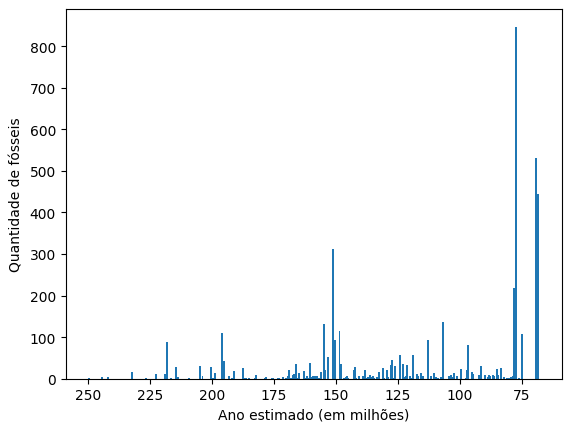

In [ ]:
plt.bar(quantidade_por_ano.index, quantidade_por_ano.values)
plt.xlabel("Ano estimado (em milhões)")
plt.gca().invert_xaxis()
plt.ylabel("Quantidade de fósseis")
plt.show()

Notamos uma prevalência de fósseis datados de por volta de 75 milhões de anos. Como já comentamos, isso não significa necessariamente que a população de dinossauros deve ter aumentado nessa época, já que essa observação está provavelmente ligada à conservação de fósseis.

Outras variáveis possíveis, que podem estar relacionadas aos outros picos no nosso gráfico, é o local das escavações e o dinossauro em questão. Vamos avaliar isso a seguir.

In [ ]:
def correlation_ratio(qualitativa, quantitativa):
    qualitativa = np.array(qualitativa)
    quantitativa = np.array(quantitativa)

    ssw = 0
    ssb = 0
    for categoria in set(qualitativa):
        subgroup = quantitativa[np.where(qualitativa == categoria)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(quantitativa))**2

    return (ssb / (ssb + ssw))**(1/2)

In [ ]:
correlation_ratio(dinos["name"], dinos["media_ma"])

0.9887207116499628

Note que o valor está muito próximo de 1, o que significa que o dinossauro e a idade média estimada estão fortemente relacionados. Assim, os picos do nosso gráfico devem estar relacionados a dinossauros específicos que possuem muitas ocorrências de fósseis. Vamos avaliar isso para os cinco dinossauros com mais ocorrências:

Text(0, 0.5, 'Ano estimado (em milhões)')

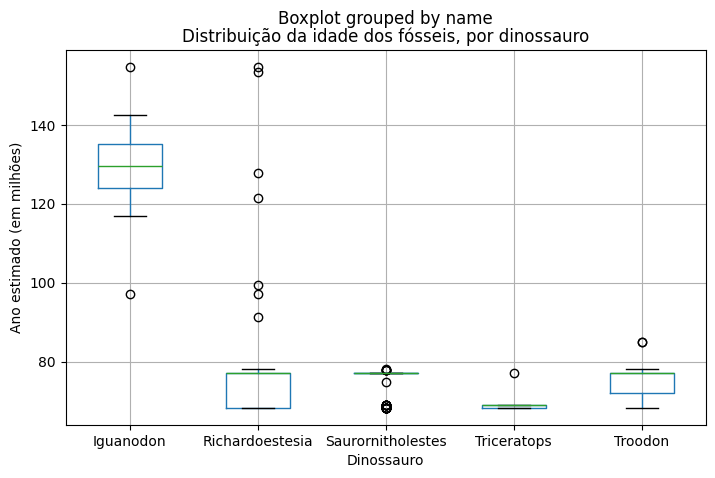

In [ ]:
mais_ocorr_nome = dinos[dinos["name"].isin(dinos["name"].value_counts().index[0:5])]

mais_ocorr_nome.boxplot(column="media_ma", by="name", figsize = (8, 5))
plt.title("Distribuição da idade dos fósseis, por dinossauro")
plt.xlabel("Dinossauro")
plt.ylabel("Ano estimado (em milhões)")

Podemos perceber que o Iguanodon contrubui fortemente para o pico por voltar 125 milhões de anos enquanto os outros quatro estão contribuindo para o maior pico, por volta de 75 milhões de anos.

In [ ]:
correlation_ratio(dinos["region"], dinos["media_ma"])

0.8412126421893732

Percebemos que a correlação nesse caso também é alto, embora não tanto quanto entre nomes e a idade estimada. Assim como no outro caso, faremos uma análise mais detalhada com as cinco regiões em que mais há ocorrências.

Text(0, 0.5, 'Ano estimado (em milhões)')

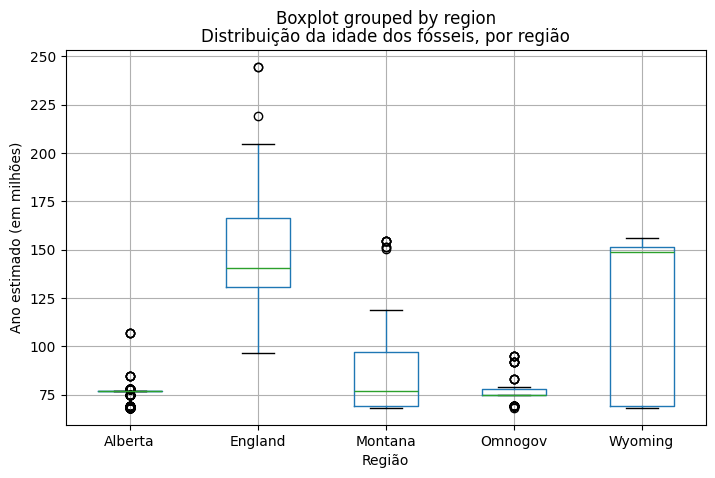

In [ ]:
mais_ocorr_regiao = dinos[dinos["region"].isin(dinos["region"].value_counts().index[0:5])]

mais_ocorr_regiao.boxplot(column="media_ma", by="region", figsize = (8, 5))
plt.title("Distribuição da idade dos fósseis, por região")
plt.xlabel("Região")
plt.ylabel("Ano estimado (em milhões)")

Note que England e Wyoming contribuem para o pico por volta de 150 milhões de anos, enquanto Alberta, Montana e Omnogov contribuem para o pico de 75 milhões de anos.

##**Distribuição geográfica**

Acabamos de ver a distribuição da idade estimada dos fósseis nas cinco regiões com mais ocorrências. Vamos agora focar nas localizações das ocorrências, usando um mapa.

In [ ]:
cores = {}
for i in range(len(dinos["type"].value_counts())):
  cores[dinos["type"].value_counts().index[i]] = i

dinos["cor"] = dinos["type"].map(cores)

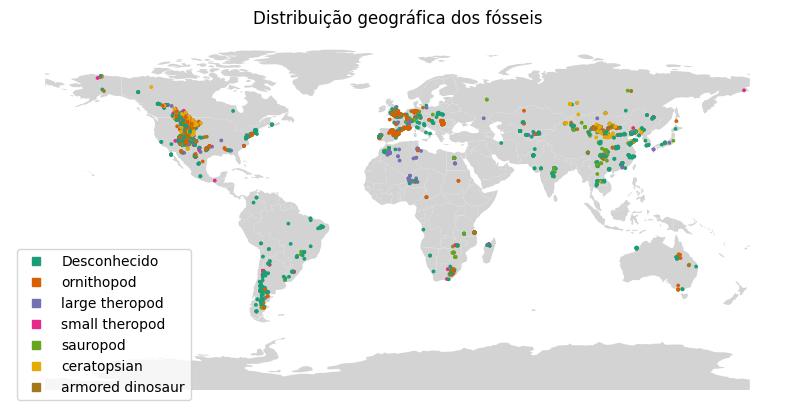

In [ ]:
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

fig, ax = plt.subplots(figsize = (10,10))
world.plot(color = "lightgrey", ax = ax)
cores_normalizado = mpl.colors.Normalize(vmin = 0, vmax = 8)
dinos.plot.scatter(x = "lng", y = "lat", s=3, c = "cor", colormap = "Dark2", colorbar = False, norm = cores_normalizado, ax = ax)
plt.title("Distribuição geográfica dos fósseis")

legenda = []
for valor in cores.values():
  legenda.append(plt.Line2D([], [], color=plt.cm.Dark2(valor), marker='s', ls='', label = list(cores.keys())[valor]))

plt.legend(handles = legenda)
plt.axis("off")
plt.xlabel("")
plt.ylabel("")

plt.show()

Notamos que regiões como o norte da América e a Europa ocidental a parte da Ásia possuem uma grande concentração de fósseis, e (quase) todos os tipos de dinossauros são encontrados nessas regiões. Em outras regiões, como na América Latina, na África e na Oceania as ocorrências são mais esparsas e nem todos os tipos de dinossauros, e grande parte das ocorrências são de tipo desconhecido.

Por fim, vamos plotar mapas para cada 25 milhões de anos.

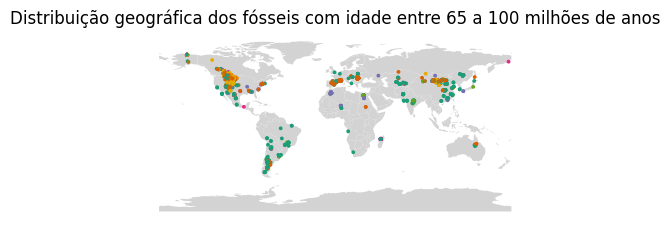

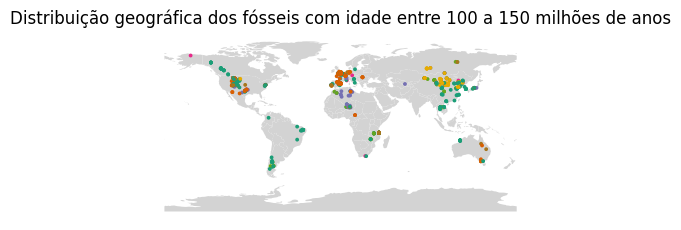

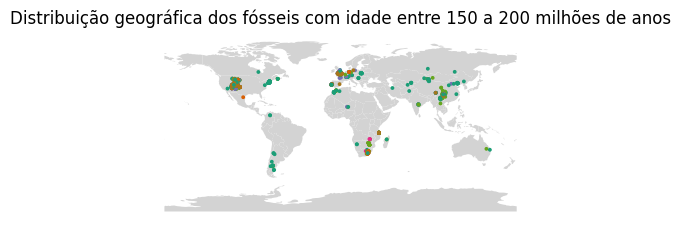

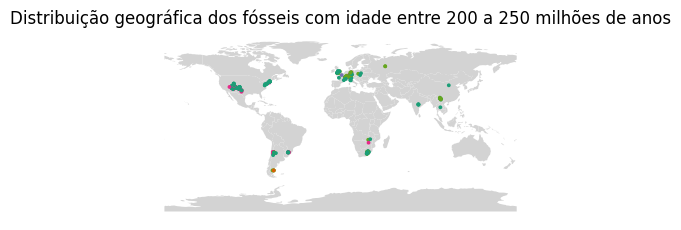

In [ ]:
epoca65_100 = dinos.loc[(dinos["media_ma"] <100)]
epoca100_150 = dinos.loc[(dinos["media_ma"] >=100) & (dinos["media_ma"] <150)]
epoca150_200 = dinos.loc[(dinos["media_ma"] >=150) & (dinos["media_ma"] <200)]
epoca200_250 = dinos.loc[(dinos["media_ma"] >=200) & (dinos["media_ma"] <250)]

titulos = ["65 a 100 milhões", "100 a 150 milhões", "150 a 200 milhões", "200 a 250 milhões"]

for epoca in [epoca65_100, epoca100_150, epoca150_200, epoca200_250]:
  titulo = titulos.pop(0)
  fig, ax = plt.subplots(figsize = (5,5))
  world.plot(color = "lightgrey", ax = ax)
  cores_normalizado = mpl.colors.Normalize(vmin = 0, vmax = 8)
  epoca.plot.scatter(x = "lng", y = "lat", s=3, c = "cor", colormap = "Dark2", colorbar = False, norm = cores_normalizado, ax = ax)
  plt.title(f"Distribuição geográfica dos fósseis com idade entre {titulo} de anos")

  plt.axis("off")
  plt.xlabel("")
  plt.ylabel("")

  plt.show()

Podemos perceber, por exemplo, que os fósseis encontrados no Brasil todos tem idade estimada de no máximo 150 milhões de anos. Por outro lado, Estados Unidos e Europa tem registros de fósseis de todas as épocas.